# DATA DISCOVERY & VISUALISATION : Assignment 2 

##### Name : Syed Muhammad Nuruddin Aljunied
##### StudentID : S10244211

#### Presentation Link : https://www.youtube.com/watch?v=p6GvLrYmjws

# Table of Contents 
### 1. Project Objectives
   - [1.1 Target Audience](#part1.1)
   - [1.2 List of Exploratory Questions](#part1.2)
   
### 2. Data Preparation
   - [2.1 Data Cleaning Process](#part2.1)
   - [2.2 Data Exploration](#part2.2)

### 3. Data Visualisation
   - [3.1 Travel Analysis](#part3.1)
   - [3.2 Customer Analysis](#part3.2)
   - [3.3 Stay Analysis](#part3.3)

### 4. Reflection 

# 1. Project Objectives <a id="part1"></a>

As a part of the tourism research team for Merlion Tour, the objective of this assignment is to analyse data on Indonesian tourists that come to visit Singapore over the past 2 years. Ultimately, the goal of the research team is to understand their customers better in order to market to them efficiently and examine whether there are variations in the client attributes between the product lines.

## 1.1 Target Audience <a id="part1.1"></a>

The target audience I have chosen for this report is Merlion Tour's research team itself. As a data analyst for the research team, I will come up with research questions the team may have on the tourists and their characteristics and form visualisations and dashboards to answer those questions effectively. This will also allow the research team to plan and strategise ways to attract these tourists as customers for Merlion Tour. 

## 1.2 List of Exploratory Questions <a id="part1.2"></a>

### Travel Analysis : 

1. At which time of the year typically do customers visit?
2. What is the most popular travel type amongst tourists? 
3. Which terminals did most tourists arrive at? 

### Customer Analysis : 

4. What languages did tourists speak? 
5. What occupations were tourists working as?  
6. Which industries were most tourists from? 
7. What is the distribution of the expenses of tourists? 
8. What is the distribution of gender of tourists?  
9. What were the top 10 cities tourists came from? 
10. Who did tourists typically go with? 

### Stay Analysis  : 

11. How frequent are first visitors?
12. Typically, how long do tourists stay in the country? 
13. Which accommodation type is the most popular amongst tourists? 
14. Typically what did tourists visit for? 
15. What were the top 10 hotels did tourists go to? 



# 2. Data Preparation <a id="part2"></a>

## Importing Libraries 

In [2]:
# Importing NumPy and Pandas libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

!pip install squarify 
!pip install circlify

## Importing the dataset 

In [3]:
# Import dataset - manually changed to .csv , removed metadata sheet.
df = pd.read_csv('mock indonesian traveller survey data.csv')

# Copy of the dataframe, df_bkup
df_bkup = df.copy()

## State of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   case                8887 non-null   int64  
 1   Year                8887 non-null   int64  
 2   R.mth               8887 non-null   object 
 3   date                8887 non-null   object 
 4   Country_residence   8887 non-null   object 
 5   City_residence      8887 non-null   object 
 6   Purpose_grp         8887 non-null   object 
 7   Purpose             8887 non-null   object 
 8   Air_Terminal        5697 non-null   object 
 9   Sea_Terminal        2828 non-null   object 
 10  Land_Terminal       355 non-null    object 
 11  langint             8887 non-null   object 
 12  1st_visit           8887 non-null   object 
 13  length_stay         8887 non-null   object 
 14  travel_type         8887 non-null   object 
 15  f1_gender           8887 non-null   object 
 16  f3_occ

In [5]:
df.head()

,case,Year,R.mth,date,Country_residence,City_residence,Purpose_grp,Purpose,Air_Terminal,Sea_Terminal,...,totmedi_$,tototh_$,totshopping_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,1-Jan-15,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,Terminal 1,NaN,...,0.00,0.0,854.85,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NaN,HCC,...,0.00,0.0,171.52,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NaN,HCC,...,0.00,0.0,104.85,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,44,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Others,NaN,HCC,...,0.00,0.0,220.85,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,45,2015,January,1-Jan-15,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",NaN,HCC,...,0.00,0.0,104.85,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


In [6]:
# Checking for null values 
df.isnull().any()

case                  False
Year                  False
R.mth                 False
date                  False
Country_residence     False
City_residence        False
Purpose_grp           False
Purpose               False
Air_Terminal           True
Sea_Terminal           True
Land_Terminal          True
langint               False
1st_visit             False
length_stay           False
travel_type           False
f1_gender             False
f3_occupation         False
f4_industry            True
f5_designation         True
f5_designation.oth     True
totacc_$              False
totfnb_$              False
tottran_$             False
totbiz_$              False
totedu_$              False
totmedi_$             False
tototh_$              False
totshopping_$         False
MainAccomm             True
MainHotel              True
travel_companion.1    False
travel_companion.2     True
travel_companion.3     True
travel_companion.4     True
travel_companion.5     True
dtype: bool

After looking through the dataset, I have concluded that it is not clean and complete and hence requires data cleaning.This process involves : 

- removing and/or replacing null values 
- changing of headers for better clarity 
- string reformatting (for spelling errors) 
- changing the data types of columns
- joining columns where necessary 

## 2.1 Data Cleaning Process <a id="part2.1"></a>

## Preparing the dataset 

### Removing unneccesary columns 

These columns were removed because I felt that information in them were not required.

In [7]:
# Remove country and case column - all tourists are from Indonesia and case column is not required  
df = df.drop(['Country_residence','case','Purpose'],axis = 1) 

### Changing of column names for better clarity 

To improve the readability of columns, I have renamed all of the columns using the .rename() function.

In [8]:
# Changing of column names
df.rename(columns={'R.mth': 'month', 'f1_gender': 'gender','f3_occupation': 'occupation','f4_industry': 'industry',
                  'f5_designation': 'designation','f5_designation.oth': 'oth_designation','totacc_$': 'acc_exp',
                  'totfnb_$': 'fnb_exp','tottran_$': 'trans_exp','totbiz_$': 'biz_exp','totedu_$': 'edu_exp',
                  'totmedi_$': 'medi_exp','tototh_$': 'oth_exp','totshopping_$': 'shopping_exp','MainAccomm': 'acc_type',
                  'MainHotel': 'hotel_name','Purpose_grp':'purpose'}, inplace=True)


In [9]:
# Lowercase all to standardise after changing 
df.columns = [x.lower() for x in df.columns]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                8887 non-null   int64  
 1   month               8887 non-null   object 
 2   date                8887 non-null   object 
 3   city_residence      8887 non-null   object 
 4   purpose             8887 non-null   object 
 5   air_terminal        5697 non-null   object 
 6   sea_terminal        2828 non-null   object 
 7   land_terminal       355 non-null    object 
 8   langint             8887 non-null   object 
 9   1st_visit           8887 non-null   object 
 10  length_stay         8887 non-null   object 
 11  travel_type         8887 non-null   object 
 12  gender              8887 non-null   object 
 13  occupation          8887 non-null   object 
 14  industry            6043 non-null   object 
 15  designation         5791 non-null   object 
 16  oth_de

### Reformatting columns with currency values 

In the dataset, I found that some of the columns with currency values were objects instead of floats. Hence, I had to change the format of the currency value (namely those above 4 digits) by removing the commas. 

In [10]:
# Removing comma in currency 
df['acc_exp'] = df['acc_exp'].replace(',','', regex =True)
df['fnb_exp'] = df['fnb_exp'].replace(',','', regex =True)
df['biz_exp'] = df['biz_exp'].replace(',','', regex =True)
df['edu_exp'] = df['edu_exp'].replace(',','', regex =True)
df['medi_exp'] = df['medi_exp'].replace(',','', regex =True)
df['shopping_exp'] = df['shopping_exp'].replace(',','', regex =True)

### Changing data types appropriately

After reformatting the strings, I can simply change the data type of the respective columns.

In [11]:
# Changing data types to float 
df['acc_exp'] = df['acc_exp'].astype(float)
df['fnb_exp'] = df['fnb_exp'].astype(float)
df['biz_exp'] = df['biz_exp'].astype(float)
df['edu_exp'] = df['edu_exp'].astype(float)
df['medi_exp'] = df['medi_exp'].astype(float)
df['shopping_exp'] = df['shopping_exp'].astype(float)

I also found that the 'date' column in the dataset was an object instead of in a datetime type, hence I also changed it as well. 

In [12]:
# Changing data type to datetime
df['date'] = pd.to_datetime(df['date'])

### Created total_exp column 

To enhance data on expenses, I have decided to make a new column called total_exp. The column will be a sum of all the categories of expenses, which will give us a full overview of the total spending of a tourist. 

In [13]:
df['total_exp'] = df[df.filter(regex='exp').columns].sum(axis =1)
df['total_exp']

0       1096.18
1        379.31
2        420.72
3        378.99
4        342.36
         ...   
8882     152.88
8883     100.86
8884     794.74
8885    1157.29
8886     211.89
Name: total_exp, Length: 8887, dtype: float64

### Replacing null values 

In [14]:
# Replacing null values
df['designation'].fillna('NA',inplace = True)
df['oth_designation'].fillna('NA',inplace = True)

df['acc_type'].fillna('Others',inplace = True)

### Reformatting length_stay column :
For the length_stay column, as I would like to perform aggregate functions and derive distributions on how long a tourist stays, I have changed its data type to a numerical data type.

In [15]:
# Identfying all types of formats in length_stay
df['length_stay'].value_counts()

2 days            2159
Under 1 day       1827
1 day             1639
3 days            1460
4 days             699
5 days             335
6 days             199
15-29 days         174
8-10 days          156
7 days             134
11-14 days          75
30-59 days          29
60 days & over       1
Name: length_stay, dtype: int64

After identifying all the string formats found in the length_stay column, I changed the values accordingly using a dictionary. For the formats with ranges such as '11-14 days', I changed them to the median of the range. 

In [16]:
# Changing data in length_stay column 

amt_days = {'Under 1 day' : 0,'1 day' : 1,'2 days' : 2,'3 days' : 3,'4 days' : 4,'5 days' : 5,'6 days' : 6,'7 days' : 7,
        '8-10 days' : 9,'11-14 days' : 12.5,'15-29 days' : 22,'30-59 days' : 44.5, '60 days & over': 60}

# Map values into length_stay 

df['length_stay'] = df['length_stay'].map(amt_days)

#Check length_stay has been changed

df['length_stay']

0       4.0
1       2.0
2       3.0
3       1.0
4       1.0
       ... 
8882    0.0
8883    0.0
8884    0.0
8885    2.0
8886    1.0
Name: length_stay, Length: 8887, dtype: float64

In [17]:
# Finding index of rows with only null values 
df.loc[df["air_terminal"].isna() & df["sea_terminal"].isna() & df["land_terminal"].isna()]

,year,month,date,city_residence,purpose,air_terminal,sea_terminal,land_terminal,langint,1st_visit,...,oth_exp,shopping_exp,acc_type,hotel_name,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5,total_exp
1884,2015,June,2015-06-08,Jakarta,Leisure,NaN,NaN,NaN,Hybrid Indonesian,Yes,...,0.0,1087.98,Hotel,Grand Hyatt Singapore,Children aged 0-7 yrs,Children aged 8-12 yrs,Other relatives,NaN,NaN,1399.67
6822,2014,July,2014-07-02,Jakarta,Leisure,NaN,NaN,NaN,Hybrid Indonesian,Yes,...,0.0,143.32,Hotel,V Hotel (Not Specified),Parents/ Parents-in-law,Other relatives,NaN,NaN,NaN,407.94
6823,2014,July,2014-07-02,Jakarta,Leisure,NaN,NaN,NaN,Hybrid Indonesian,No,...,0.0,593.32,Hotel,V Hotel (Not Specified),Spouse,NaN,NaN,NaN,NaN,2424.77
6824,2014,July,2014-07-02,Surabaya,Leisure,NaN,NaN,NaN,Hybrid Indonesian,No,...,0.0,93.32,Hotel,Parc Sovereign Hotel,Spouse,Children aged 8-12 yrs,Children aged 13-19 yrs,NaN,NaN,2284.39
6825,2014,July,2014-07-02,Dumai,Leisure,NaN,NaN,NaN,Hybrid Indonesian,No,...,0.0,293.32,Stayed with relatives/ friends,NaN,Spouse,NaN,NaN,NaN,NaN,360.13
6826,2014,July,2014-07-02,Jakarta,Leisure,NaN,NaN,NaN,English,Yes,...,0.0,93.32,Hotel,Other Hotels,Spouse,Children aged 13-19 yrs,NaN,NaN,NaN,426.59
6827,2014,July,2014-07-02,Jakarta,Leisure,NaN,NaN,NaN,Hybrid Indonesian,No,...,0.0,103.80,Hotel,Amrise Hotel,Spouse,Children aged 8-12 yrs,Children aged 13-19 yrs,Siblings,NaN,299.48


In [18]:
# Dropping rows with nulls only
df.drop([1884, 6822, 6823, 6824, 6825, 6826, 6827], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8880 entries, 0 to 8886
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                8880 non-null   int64         
 1   month               8880 non-null   object        
 2   date                8880 non-null   datetime64[ns]
 3   city_residence      8880 non-null   object        
 4   purpose             8880 non-null   object        
 5   air_terminal        5697 non-null   object        
 6   sea_terminal        2828 non-null   object        
 7   land_terminal       355 non-null    object        
 8   langint             8880 non-null   object        
 9   1st_visit           8880 non-null   object        
 10  length_stay         8880 non-null   float64       
 11  travel_type         8880 non-null   object        
 12  gender              8880 non-null   object        
 13  occupation          8880 non-null   object      

### Combining all terminal values into one column for better clarity
For the columns with the respective terminals, I realized that they should be combined into one column. This so that I can get a full view of all the types together instead of them being separated by 3 columns. 

In [19]:
# Filling null values in terminals with an empty string 
df["air_terminal"] = df["air_terminal"].replace(np.nan,'',regex = True)
df["sea_terminal"] = df["sea_terminal"].replace(np.nan,'',regex = True)
df["land_terminal"] = df["land_terminal"].replace(np.nan,'',regex = True)

# Joining the columns as one column terminal_location
df["terminal_location"] = df[["air_terminal", "sea_terminal","land_terminal"]].apply(lambda x: "".join(x), axis =1)

In [20]:
# Creating new column for travel types 

df['air'] = df['air_terminal'].apply(lambda x : 'Air' if x != '' else '')
df['sea'] = df['sea_terminal'].apply(lambda x : 'Sea' if x != '' else '')
df['land'] = df['land_terminal'].apply(lambda x : 'Land' if x != '' else '')

# Joining all the columns into one column terminal_type 

df["terminal_type"] = df[["air", "sea","land"]].apply(lambda x: "".join(x), axis =1)
df['terminal_type'].value_counts()

Air     5697
Sea     2828
Land     355
Name: terminal_type, dtype: int64

In [21]:
# Dropping created columns - no longer needed after terminal_type is created 
df = df.drop(['air','sea','land'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8880 entries, 0 to 8886
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                8880 non-null   int64         
 1   month               8880 non-null   object        
 2   date                8880 non-null   datetime64[ns]
 3   city_residence      8880 non-null   object        
 4   purpose             8880 non-null   object        
 5   air_terminal        8880 non-null   object        
 6   sea_terminal        8880 non-null   object        
 7   land_terminal       8880 non-null   object        
 8   langint             8880 non-null   object        
 9   1st_visit           8880 non-null   object        
 10  length_stay         8880 non-null   float64       
 11  travel_type         8880 non-null   object        
 12  gender              8880 non-null   object        
 13  occupation          8880 non-null   object      

### Creating Travel Size Column

I have decided to make a column for travel size to be able to see how many people a certain tourist would bring (maximum of 5) 

In [22]:
df['travel1'] = df['travel_companion.1'].apply(lambda x : 1 if x == x and x != 'Alone' else 0)
df['travel2'] = df['travel_companion.2'].apply(lambda x : 1 if x == x  else 0) 
df['travel3'] = df['travel_companion.3'].apply(lambda x : 1 if x == x  else 0)
df['travel4'] = df['travel_companion.4'].apply(lambda x : 1 if x == x  else 0)
df['travel5'] = df['travel_companion.5'].apply(lambda x : 1 if x == x   else 0)


df['travel_size'] = df['travel1'] + df['travel2'] + df['travel3'] + df['travel4'] + df['travel5']

df['travel_size'].value_counts()

1    4370
0    2883
2    1140
3     394
4      76
5      17
Name: travel_size, dtype: int64

In [23]:
# Dropping the 5 columns made (not need)
df = df.drop(['travel1','travel2','travel3','travel4','travel5'], axis=1)

### Reformatting strings and removing spelling errors

Looking through the dataset, I noticed that there were columns with spelling errors in some of the values. In this section, I will be reformatting columns such that the spelling errors are removed, and also make the values easier for presentation and readability. 

Changing values in the designation column

In [24]:
# Identifying values 
df['designation'].value_counts()

Others (specify)                      3263
NA                                    3091
Mager/ Assistant Mager                 847
Director                               397
Senior Executive                       366
Junior Executive                       339
Clerk/ Secretary/ Persol Assistant     270
General Mager                          131
CEO/ Assistant CEO                      63
Chairman                                38
Deputy/ Assistant Director              36
President/ Vice-President               21
Board of Directors                      18
Name: designation, dtype: int64

In [25]:
df['designation'].replace('Others (specify)','Others',inplace = True)
df['designation'].replace('Mager/ Assistant Mager','Manager/ Assistant Manager',inplace = True)
df['designation'].replace('Clerk/ Secretary/ Persol Assistant','Clerk/ Secretary/ Personal Assistant',inplace = True)
df['designation'].replace('General Mager','General Manager',inplace = True)

In [26]:
# Checking values in designation column
df['designation'].value_counts()

Others                                  3263
NA                                      3091
Manager/ Assistant Manager               847
Director                                 397
Senior Executive                         366
Junior Executive                         339
Clerk/ Secretary/ Personal Assistant     270
General Manager                          131
CEO/ Assistant CEO                        63
Chairman                                  38
Deputy/ Assistant Director                36
President/ Vice-President                 21
Board of Directors                        18
Name: designation, dtype: int64

Changing the values in occupation column

In [27]:
# Checking values in occupation column 
df['occupation'].value_counts()

Homemaker (Full time)                                                        1258
Professiols (doctor, lawyer, lecturer, etc)                                  1208
Businessman (small company, <50 people)                                      1177
Mager (CEO, company director, senior mager)                                  1090
Student                                                                      1011
Executive (sales, administration)                                             773
Other White collar (Teacher, Nurse, secretary, receptionist, cashier etc)     765
Others (specify)                                                              548
Retired                                                                       347
Blue collar (technician, hairdresser, hawker, taxi drivers etc)               332
Businessman (medium size company, 50 -250 people)                             183
Unemployed                                                                    142
Businessman (lar

In [28]:
df['occupation'].replace('Homemaker (Full time)','Homemaker',inplace = True)
df['occupation'].replace('Professiols (doctor, lawyer, lecturer, etc)',
                         'Professional',inplace = True)
df['occupation'].replace('Other White collar (Teacher, Nurse, secretary, receptionist, cashier etc)',
                         'White Collar',inplace = True)

df['occupation'].replace('Others (specify)','Others',inplace = True)
df['occupation'].replace('Blue collar (technician, hairdresser, hawker, taxi drivers etc)',
                         'Blue Collar',inplace = True)
df['occupation'].replace('Mager (CEO, company director, senior mager)',
                         'Manager',inplace = True)

df['occupation'].replace('Businessman (small company, <50 people)',
                         'Businessman',inplace = True)

df['occupation'].replace('Businessman (medium size company, 50 -250 people)',
                         'Businessman',inplace = True)

df['occupation'].replace('Businessman (large company, > 250 people)',
                         'Businessman',inplace = True)

df['occupation'].replace('Executive (sales, administration)',
                         'Executive',inplace = True)

In [29]:
# Checking values in occupation column after changing
df['occupation'].value_counts()

Businessman     1406
Homemaker       1258
Professional    1208
Manager         1090
Student         1011
Executive        773
White Collar     765
Others           548
Retired          347
Blue Collar      332
Unemployed       142
Name: occupation, dtype: int64

Changing values in industry column

In [30]:
df['industry'].value_counts()

Others (specify)                                                                        1694
Wholesale and Retail Trade                                                               607
Fincial and Insurance Activities                                                         432
Manufacturing and Chemicals                                                              398
Environment and Energy                                                                   282
Education                                                                                256
Healthcare and Biomedical Sciences                                                       246
Construction                                                                             241
Accommodation and Food & Beverage-related activities                                     233
Hospitality, Travel & Tourism                                                            232
Transportation and Logistics                                          

In [31]:
df['industry'].replace('Others (specify)',
                         'Others',inplace = True)
df['industry'].replace('Professiol, Scientific and Technical Activities',
                         'Professional, Scientific and Technical Activities',inplace = True)
df['industry'].replace('Design related activities (e.g. architecture, interior, product, graphic design etc)',
                         'Design',inplace = True)
df['industry'].replace('Fincial and Insurance Activities','Financial and Insurance Activities',inplace = True )

df['industry'].replace('Accommodation and Food & Beverage-related activities','Accommodation & FNB',inplace = True)

In [32]:
# Check
df['industry'].value_counts()

Others                                               1694
Wholesale and Retail Trade                            607
Financial and Insurance Activities                    432
Manufacturing and Chemicals                           398
Environment and Energy                                282
Education                                             256
Healthcare and Biomedical Sciences                    246
Construction                                          241
Accommodation & FNB                                   233
Hospitality, Travel & Tourism                         232
Transportation and Logistics                          230
InfoComm Technology                                   200
Marketing & Media                                     182
Public Administration                                 175
Electronics & Precision Engineering                   133
Design                                                 97
Real Estate Activities                                 89
Agriculture an

Changing values in acc_type column

In [33]:
# Identifying values in acc_type
df['acc_type'].value_counts()

Hotel                                                          4290
Stayed with relatives/ friends                                 1810
Accommodation not required - Day Tripper                       1746
Hostel (Rental by bed)                                          459
Service Apartment                                               248
Own Residence                                                    89
Accommodation not required - On-board Cruise                     57
Homestay                                                         50
Other paid accommodations (e.g.chalets, country clubs, etc)      37
Others                                                           33
Accommodation not required - Others                              28
Other non-paid accommodations (e.g. religious places, camp,      23
Student Hostel                                                    6
Hospital                                                          4
Name: acc_type, dtype: int64

In [34]:
# Replacing values 
df['acc_type'].replace('Accommodation not required - Day Tripper','Accommodation not required',inplace = True)
df['acc_type'].replace('Accommodation not required - On-board Cruise','Accommodation not required',inplace = True)
df['acc_type'].replace('Accommodation not required - Others',
                       'Others',inplace = True)
df['acc_type'].replace('Hostel (Rental by bed)',
                       'Hostel',inplace = True)
df['acc_type'].replace('Other paid accommodations (e.g.chalets, country clubs, etc)',
                       'Other paid accomodations',inplace = True)
df['acc_type'].replace('Other non-paid accommodations (e.g. religious places, camp,',
                       'Other non-paid accomodations',inplace = True)

In [35]:
# Checking 
df['acc_type'].value_counts()

Hotel                             4290
Stayed with relatives/ friends    1810
Accommodation not required        1803
Hostel                             459
Service Apartment                  248
Own Residence                       89
Others                              61
Homestay                            50
Other paid accomodations            37
Other non-paid accomodations        23
Student Hostel                       6
Hospital                             4
Name: acc_type, dtype: int64

Changing values in purpose column

In [36]:
# Reformatting purpose
df['purpose'].replace('Business+Accompanying Pax','Business',inplace = True)
df['purpose'].replace('Healthcare+Accompanying Pax','Healthcare',inplace = True)
df['purpose'].replace('Education+Accompanying Pax','Education',inplace = True)
df['purpose'].replace('Others/ Refused','Others',inplace = True)

df['purpose'].value_counts()

Leisure       5648
Business      1251
Healthcare    1143
Others         650
Education      188
Name: purpose, dtype: int64

In [37]:
df['travel_companion.1'].value_counts()

Alone                                2883
Spouse                               2353
Parents/ Parents-in-law              1005
Friends                               995
Business associates/ Colleagues       473
Siblings                              311
Other relatives                       188
Others                                184
Partner/ Boyfriend/ Girlfriend        157
Children aged 0-7 yrs                  89
Children aged 20-39 yrs                84
Children aged 13-19 yrs                78
Children aged 8-12 yrs                 43
Grandparents/ Grandparents-in-law      20
Children aged 40 yrs and above         17
Name: travel_companion.1, dtype: int64

I have also decided to change the values in 1st_visit, as I felt that the values 'Yes' and 'No' were too vague. 

In [38]:
df['1st_visit'].replace('Yes','First visit',inplace = True)
df['1st_visit'].replace('No','Not first visit',inplace = True)

## 2.2 Data Exploration <a id="part2.2"></a>

In order to understand my data better, I will be using the .describe() function to derive outliers and means of the dataset. 

In [39]:
# Describing the data
df.describe()

,year,length_stay,acc_exp,fnb_exp,trans_exp,biz_exp,edu_exp,medi_exp,oth_exp,shopping_exp,total_exp,travel_size
count,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8880.000000,8.880000e+03,8.880000e+03,8880.000000
mean,2014.503829,2.751464,181.796723,88.943678,35.119260,3.391537,3.003941,216.442470,0.569386,3.157892e+03,3.687159e+03,0.925788
std,0.500013,4.231244,269.625475,141.019162,45.096481,86.233426,114.661980,2235.829607,7.635613,2.736786e+05,2.737382e+05,0.856009
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.086000e+01,8.086000e+01,0.000000
25%,2014.000000,1.000000,0.000000,15.320000,11.357500,0.000000,0.000000,0.000000,0.000000,1.018700e+02,2.069500e+02,0.000000
50%,2015.000000,2.000000,77.870000,55.050000,23.200000,0.000000,0.000000,0.000000,0.000000,1.480300e+02,4.280050e+02,1.000000
75%,2015.000000,3.000000,275.810000,115.990000,42.670000,0.000000,0.000000,0.000000,0.000000,2.680300e+02,8.548925e+02,1.000000
max,2015.000000,60.000000,3129.200000,5802.020000,786.020000,6000.000000,9000.000000,100000.000000,350.000000,2.578999e+07,2.579524e+07,5.000000


From here, I can see that the shopping_exp column has a value affecting it's mean, as it is significantly higher than the others. 

# 3. Data Visualisation <a id="part3"></a>
Now that I have went through and cleaned the dataset given, visuals on the dataset based on my research questions can be made. 

### Importing Libraries for Data Visualisation

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.gridspec import GridSpec
import squarify
import circlify
%matplotlib inline 


### Data Correlation

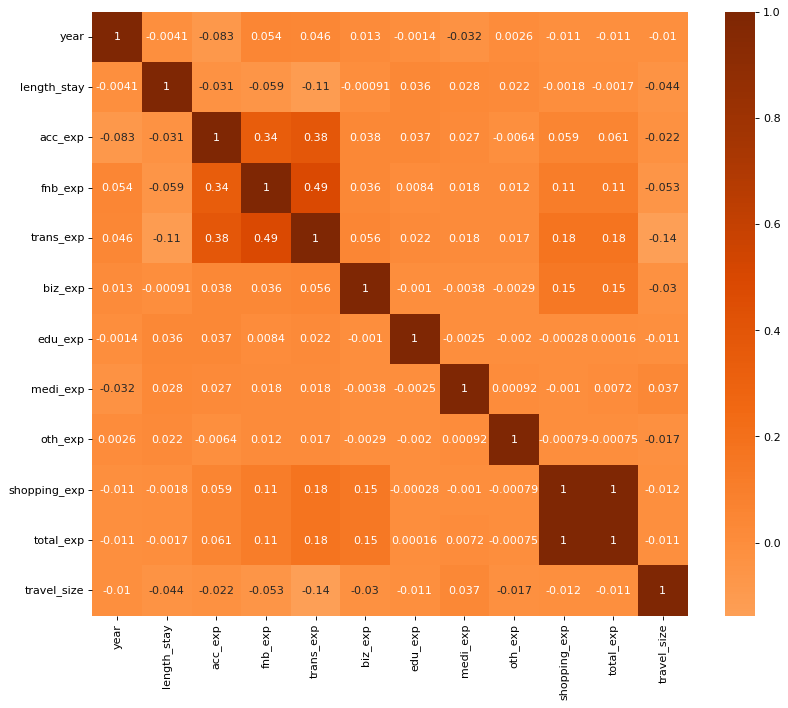

In [41]:
plt.figure(figsize=(12,10), dpi= 80) # set figure 
sns.heatmap(df.corr(),cmap='Oranges', center=0, annot=True) # visual

plt.show()

This is a visual on the correlation between all numerical values in the dataset. It can be seen here that most of the correlations between the values are negative or only slightly positive. 

It can help answer questions that the tourism company may have on the correlation of data.

## 3.1 Travel Analysis <a id="part3.1"></a>

### 3.1.1 Travel Types

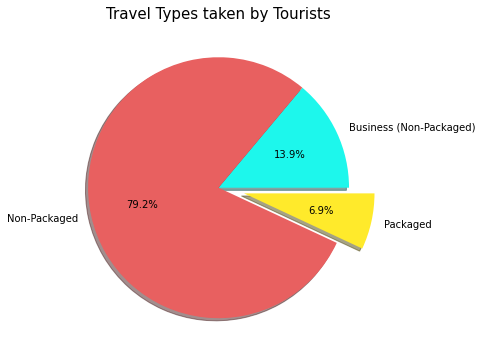

In [76]:
tourists_travel = df.groupby('travel_type')['year'].count() # count of each travel
travel_type = tourists_travel.index # travel types 

colors = ['#1df7ec','#e86060','#ffea2b'] 

fig = plt.subplots(figsize=(10,6)) # create figure 

plt.pie(tourists_travel,explode = (0,0,0.2),labels=travel_type, autopct='%1.1f%%',shadow = True,colors = colors ) # visual 

plt.title('Travel Types taken by Tourists',fontsize = 15) #title

plt.show()

To start off, this is a pie chart showing the distribution on the respective travel types taken by tourists. As you can see here,  the majority of the Indonesian tourists are on non-packaged travel types. 

By identifying what is the most popular travel type tourists take, our company will be able to know how to market to the specific travel types.

For example, most tourists tend to take non-packaged travel types. This means that the tourists come to the country without any paid planned itinerary or accommodations. This is something the tour company can capitalize on, by coming up with ways to market to those people such advertising. 

This visual will be able to answer Exploratory Question 2 - What is the most popular travel type among tourists? 


### 3.1.2 Terminals of Arrival 

Text(0.5, 1.0, 'Percentage of Terminal Arrivals of Tourists')

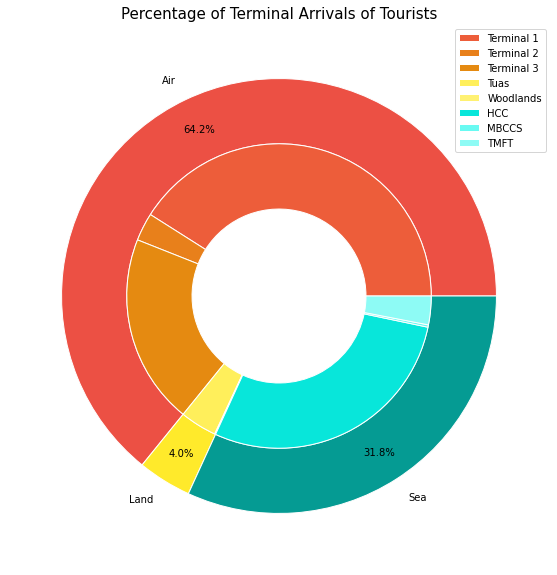

In [78]:
terminal_counts = df['terminal_type'].value_counts().sort_index() # count of each type 
terminal_types =terminal_counts.index # types
colors1 = ['#ec5044','#ffea2b','#059b93']

location_counts = df.groupby('terminal_type')['terminal_location'].value_counts().sort_index() # count of each locataion by the type
colors2 = ['#ed5d3a','#e8801b','#e58a11','#ffef5b','#fff172','#08e6da','#69faf2','#8efbf5']

fig , ax = plt.subplots(figsize = (10,10)) # set figure 
size = 0.3 # set size 
labels = ['_nolegend_'] * len(terminal_counts) # removing legend of main labels  for later 
sublabels = [x[1] for x in location_counts.index] # sublabels for terminal locations

ax.pie(terminal_counts, radius=1, # outer donut
        labels = terminal_types,
        autopct = '%1.1f%%',
        pctdistance = 0.85,
        colors = colors1,
        wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(location_counts, radius=1-size, # inner donut 
       labeldistance = 0.63,
       colors = colors2,
       wedgeprops=dict(width=size, edgecolor='w'))

plt.legend(labels + sublabels) # legend
plt.title('Percentage of Terminal Arrivals of Tourists',fontsize = 15) # set title 

This is a nested donut chart of the Percentage of Terminals that tourists arrived and came from. The outer donut represents the percentage of terminals by the terminal type, and the inner donut represents the locations of the respective terminal types. 

It can be seen here that most tourists come from air terminals. From the air terminals, most tourists come from Terminal 1 at the airport. 

It is important for a tourism company to know where most of their customers will arrive in the country.The tourism company can improve their advertising and outreach by setting up in those locations. In the case of the most popular air terminal here (Terminal 1), Merlion Tours could potentially set up shop at that terminal or set up sign boards advertising their tourism packages for tourists to see.

This visual  will help to answer Exploratory Question 3 - Which terminals did most tourists arrive at? 


### 3.1.3 Number of visits per month

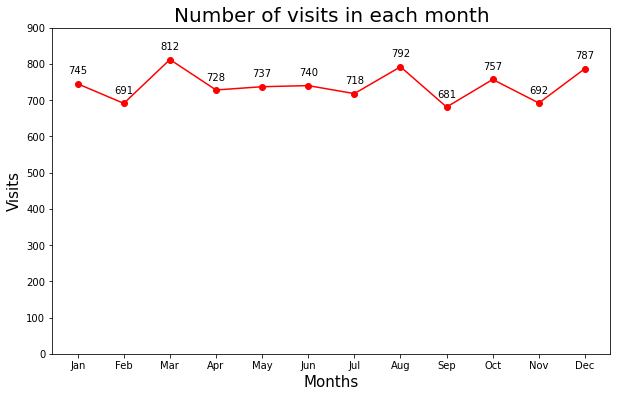

In [44]:
num_visits = df.groupby(df.date.dt.month)['year'].count() # number of visits by month 
months_index = [x[:3] for x in df.month.unique()] # getting the month in string i.e. 'Jan'

fig = plt.subplots(figsize = (10,6)) # figure 
plt.plot(months_index,num_visits,'r-o') # visual 
plt.ylim(bottom = 0,top = 900)
plt.title('Number of visits in each month',fontsize = 20) # title 
plt.xlabel('Months',fontsize = 15) # set x label
plt.ylabel('Visits',fontsize = 15) # set y label

for x, y in zip(months_index,num_visits): # annotation

    label = y

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center') 
plt.show()

Next, the number of visits in each month shown by a line graph. 

Reading this graph, it can be seen that the influx of visiting tourists is quite constant throughout the months, with only February, September , and November having a lesser number of visits. 

Through knowing how the number of tourists that come into the country changes over time, the tour company will be able to strategically plan out which times the year to focus on gaining customers. 

This visual will help to answer Exploratory Question 1. 


### Dashboard 1 - Analysis of Travel

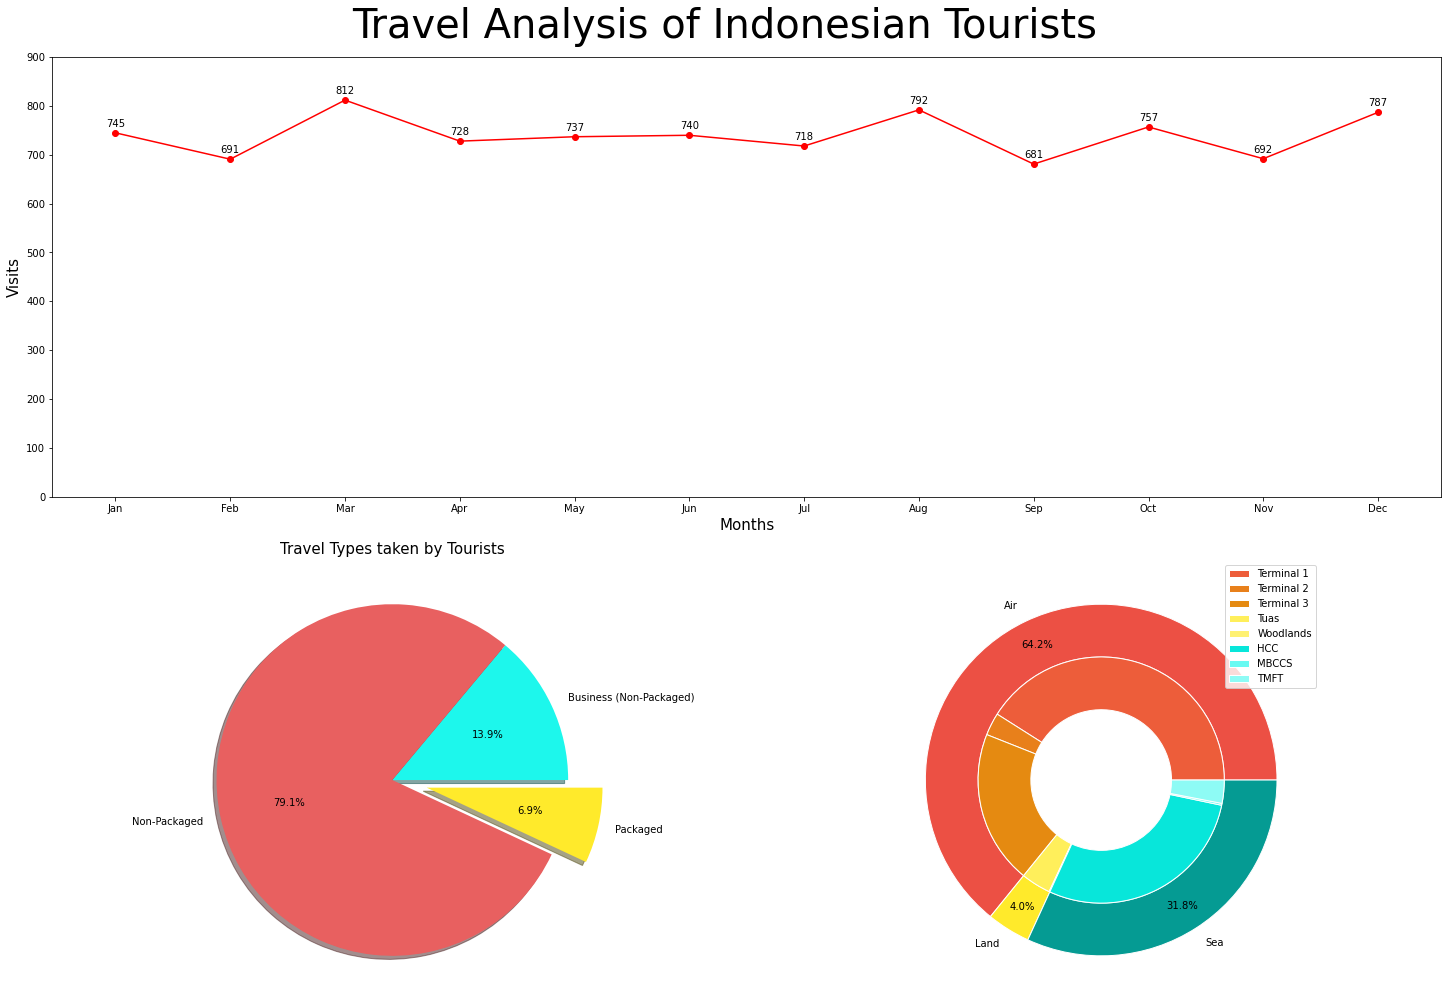

In [45]:
fig = plt.figure(figsize=(20,20), constrained_layout=True) # set figure 


gs = GridSpec(nrows=3, ncols=2, figure=fig) # gridspec for dashboard


ax1 = fig.add_subplot(gs[0, :]) # set first ax

# visual 

num_visits = df.groupby(df.date.dt.month)['year'].count()
months_index = [x[:3] for x in df.month.unique()]

ax1.plot(months_index,num_visits,'r-o')
plt.ylim(bottom = 0,top = 900)
plt.xlabel('Months',fontsize = 15)
plt.ylabel('Visits',fontsize = 15)

for x, y in zip(months_index,num_visits):

    label = y 

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,6),
                 ha='center') 

ax2 = fig.add_subplot(gs[1, 1])  # set second ax 

# visual 
terminal_counts = df['terminal_type'].value_counts().sort_index() #(Air : 5697, Land : 355, Sea : 2827) 
terminal_types =terminal_counts.index 
colors1 = ['#ec5044','#ffea2b','#059b93']

location_counts = df.groupby('terminal_type')['terminal_location'].value_counts().sort_index() # (Sea,Air,Land)
colors2 = ['#ed5d3a','#e8801b','#e58a11','#ffef5b','#fff172','#08e6da','#69faf2','#8efbf5']

size = 0.3
labels = ['_nolegend_'] * len(terminal_counts)
sublabels = [x[1] for x in location_counts.index]
ax2.pie(terminal_counts, radius=1,
        labels = terminal_types,
        autopct = '%1.1f%%',
        pctdistance = 0.85,
        colors = colors1,
        wedgeprops=dict(width=size, edgecolor='w'))

ax2.pie(location_counts, radius=1-size,
       labeldistance = 0.63,
       colors = colors2,
       wedgeprops=dict(width=size, edgecolor='w'))

plt.legend(labels + sublabels)

ax3 = fig.add_subplot(gs[1,0]) # set third ax

# visual 

tourists_travel = df.groupby('travel_type')['year'].count()
travel_type = tourists_travel.index

colors = ['#1df7ec','#e86060','#ffea2b']

ax3.pie(tourists_travel,explode = (0,0,0.2),labels=travel_type, autopct='%1.1f%%',shadow = True,colors = colors )

ax3.set_title('Travel Types taken by Tourists',fontsize = 15)

plt.suptitle('Travel Analysis of Indonesian Tourists',fontsize = 40)
plt.show()

This is a dashboard on the Travel Analysis of Indonesian Tourists.It contains a line chart on the number of visits in the country per month (of tourists), a nested donut chart with the types of terminals tourists arrived in as the outer donut and the inner donut as the respective locations of that terminal type, and a pie chart on the travel types tourists used to come to the country.This dashboard can be used to analyse the travel patterns and demographics of tourists visiting the country.

The line chart would display the number of visitors over time, enabling for examination of patterns and swings in tourism activity. The nested donut chart would reveal the sorts of terminals in which tourists came from, as well as the locations of each terminal type. This data could be utilised to better evaluate the popularity of various arrival points, allowing for the tourism company to drive allocation of resources and strategic marketing.

The pie chart would show the distribution of travel types, such as packaged, non-packaged, and business (non-packaged), providing a clear understanding of the methods in which tourists in which are visiting the country by.

Overall, this dashboard would give a complete picture of demographics and travel habits of tourists, enabling a better comprehension of the requirements and habits of tourists.


## 3.2 Customer Analysis <a id="part3.2"></a>

### 3.2.1 Languages Spoken

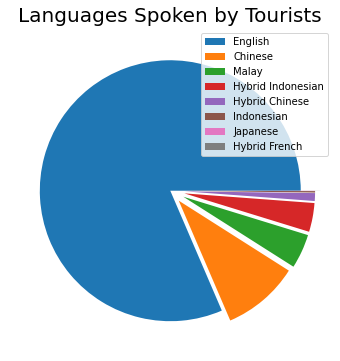

In [81]:
languages_count = df['langint'].value_counts() # count of languges 
languages = languages_count.index # for label 

explode = (0,0.1,0.11,0.11,0.11,0.11,0.11,0.15)  
fig = plt.subplots(figsize = (10,6)) # set figure
plt.pie(languages_count,explode = explode) # visual 
plt.title('Languages Spoken by Tourists',fontsize = 20) #title 
plt.legend(languages)

plt.show()

This a pie chart on the distribution of the languages spoken by tourists. 

It can be seen here that most tourists speak English. However, it is important for the tourism company to know which languages their customers may speak, in order to cater to everyone or majority of the tourists. 

This visual answers Exploratory Question 4 - Which languages did tourists speak? 

### 3.2.2 Occupations of Tourists

Text(0.5, 1.0, 'Occupations of tourists')

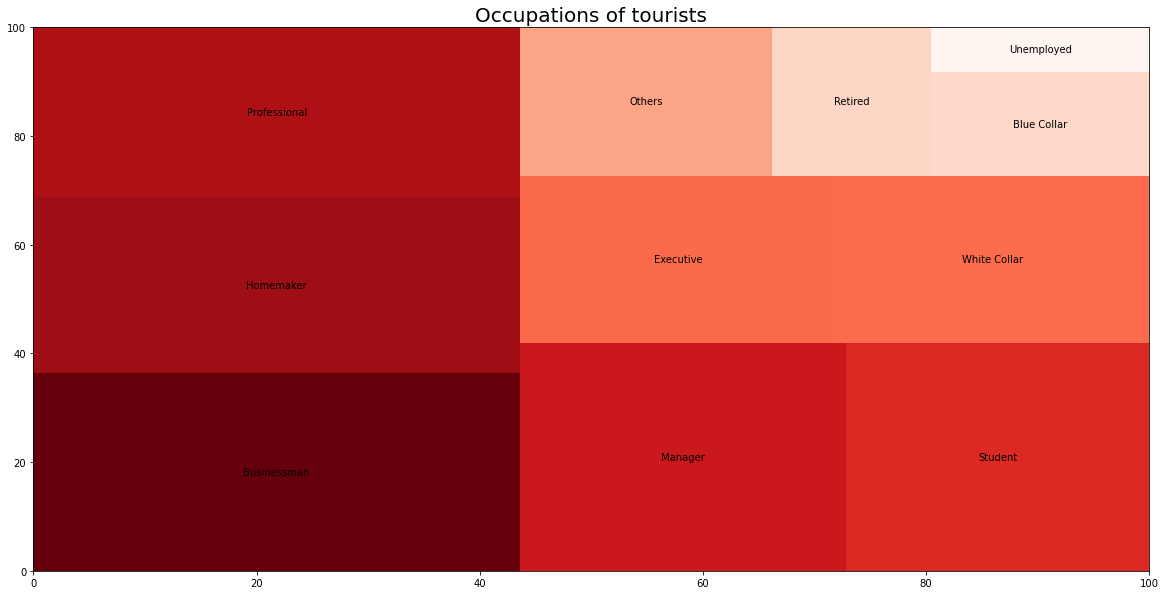

In [47]:
occupation_counts = df['occupation'].value_counts() # count for each occupation
occupations = occupation_counts.index # labels 

fig = plt.subplots(figsize = (20,10)) # set figure 
cmap = mpl.cm.Reds # color 
mini=min(occupation_counts) # minimum of count
maxi=max(occupation_counts) # maximum of count 
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in occupation_counts] # set colors 

squarify.plot(occupation_counts,label = occupations,color= colors) # visual 

plt.title('Occupations of tourists',fontsize = 20) # set title 

This is a treemap on the occupations of tourists. To interpret this visual, the colour of the box represents the number of people in that category of occupations. As the shade gets darker, it means there is  a higher number of people working that occupation. The area of the box also represents the number of people in that occupation by a range.Even though some boxes have the same area, it does not mean that the number of people in that category is the same.  

By looking at this visual, the tourism board will be able to see what most of the tourists are working as, namely the top 5 : 
- Businessmen
- Homemakers
- Professionals
- Managers 
- Students 

It is crucial for the tourism company to recognise who are the types of the tourists that visit the country (by occupation) in order to market to them properly, by trying to relate to them or attract them into becoming potential customers.

This visualisation will be able to answer Exploratory Question 5 - What occupations were tourists working as? 


###  3.2.3 Industries of Working Tourists

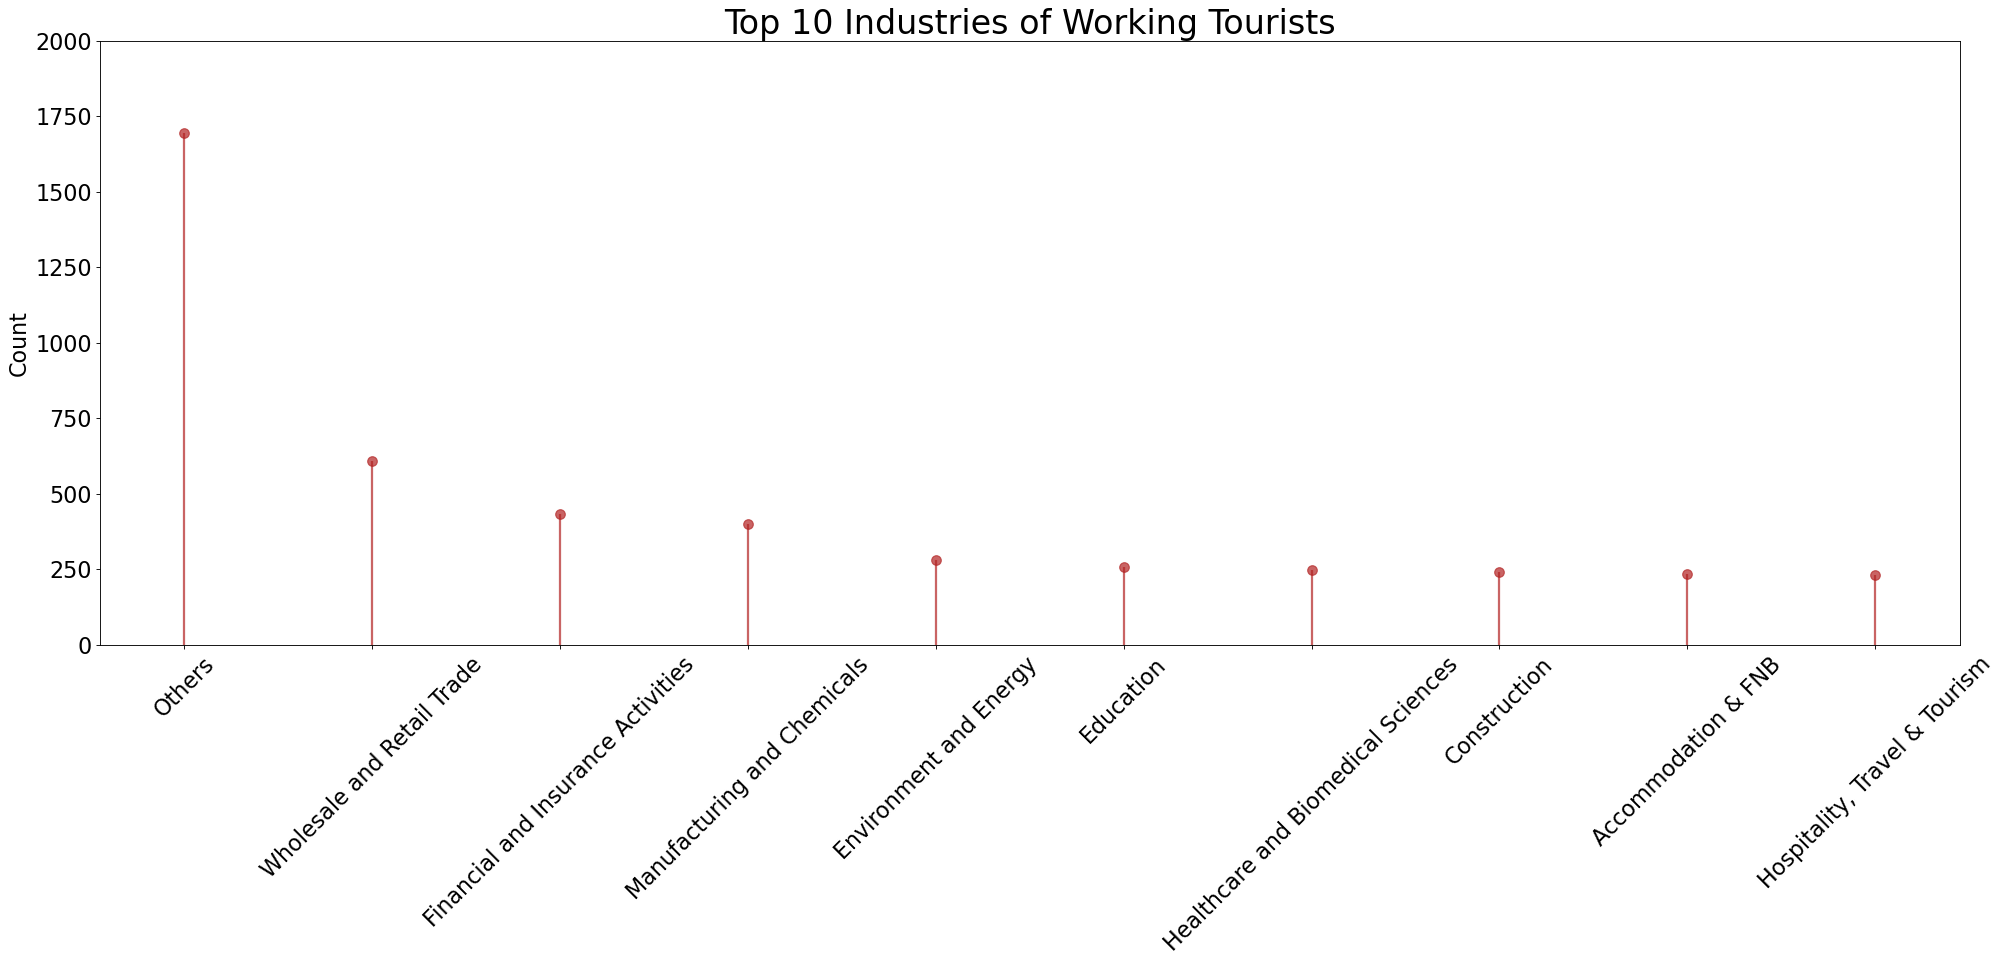

In [84]:
industries_count = df['industry'].value_counts().sort_values(ascending = False) # count of industry 
industries_count = industries_count.head(10) # top 10
industries = industries_count.index # industries - for label 


# Draw plot
fig, ax = plt.subplots(figsize=(30,10), dpi= 80) # figure 
ax.vlines(x=industries, ymin=0, ymax=industries_count, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=industries, y=industries_count, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Top 10 Industries of Working Tourists', fontdict={'size':30}) # title 
ax.set_ylabel('Count',fontsize =20) # label 
ax.set_ylim(0,2000)


plt.xticks(fontsize = 20,rotation = 45) # tick rotation
plt.yticks(fontsize = 20) # y ticks 

plt.show()

This is a lollipop chart on the top 10 industries that tourists came from. By knowing which industries tourists are typically from, it can help the tourism company profile their customers better and be able to market to them easier (can be done through research on what the industries entail).

This visual answers the Exploratory Question 6 - Which industries did most tourists come from?

### 3.2.4 Customer Expenditure by Categories

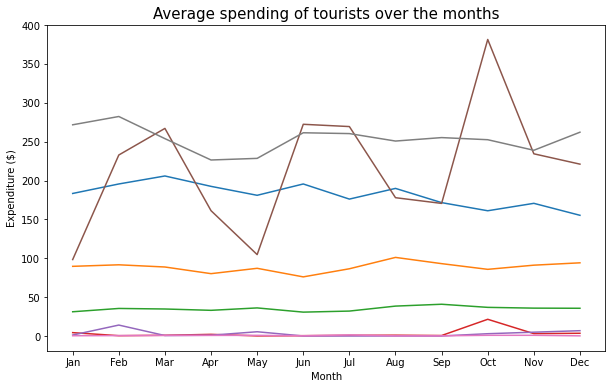

In [88]:
fig,ax = plt.subplots(figsize = (10,6)) # setting figure 

acc = df.groupby(df.date.dt.month)['acc_exp'].mean() # mean accommodation
fnb = df.groupby(df.date.dt.month)['fnb_exp'].mean() # mean fb
trans = df.groupby(df.date.dt.month)['trans_exp'].mean() # mean for transport 
biz = df.groupby(df.date.dt.month)['biz_exp'].mean() # mean for business
edu = df.groupby(df.date.dt.month)['edu_exp'].mean()  # mean for education
medi = df.groupby(df.date.dt.month)['medi_exp'].mean() # mean for healthcare
oth = df.groupby(df.date.dt.month)['oth_exp'].mean() # mean for others 
shopping = df.groupby(df.date.dt.month)['shopping_exp'].mean() # meean for shopping

months_index = [x[:3] for x in df.month.unique()]

# plot each line 

ax.plot(months_index, acc,label='Accomodation')
ax.plot(months_index, fnb,label='FNB')
ax.plot(months_index, trans,label='Transport')
ax.plot(months_index, biz,label='Business')
ax.plot(months_index,edu,label='Education')
ax.plot(months_index, medi,label='Healthcare')
ax.plot(months_index, oth,label='Others')
ax.plot(months_index, shopping,label = 'Shopping')
plt.title('Average spending of tourists over the months',fontsize = 15) # title 
plt.xlabel('Month') # xlabel
plt.ylabel('Expenditure ($)') # ylabel

plt.show()

Upon making this chart, I realized that there was a value affectingn the mean that was disoreinting the lines.

To fix this, I will find the value that is affecting the mean. 

In [50]:
df[df['shopping_exp']>100000].filter(regex = 'shopping', axis =1)

,shopping_exp
7003,25789993.32


With the found value, I will simply drop it so that it does not affect the means in my data. 

In [51]:
df = df.drop(7003)

df[df['shopping_exp']>100000].filter(regex = 'shopping', axis =1)

,shopping_exp


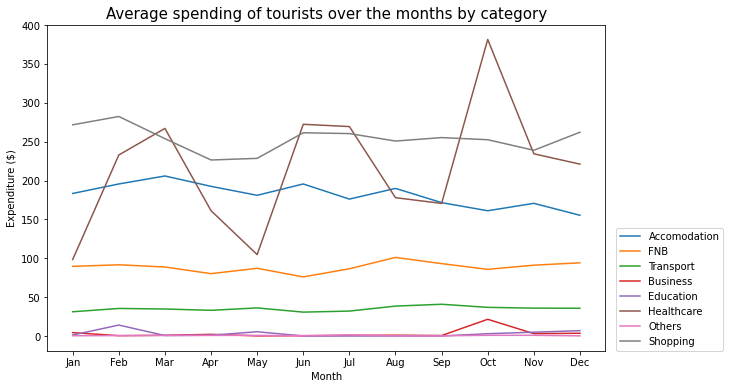

In [52]:
fig,ax5 = plt.subplots(figsize = (10,6))

acc = df.groupby(df.date.dt.month)['acc_exp'].mean()
fnb = df.groupby(df.date.dt.month)['fnb_exp'].mean()
trans = df.groupby(df.date.dt.month)['trans_exp'].mean()
biz = df.groupby(df.date.dt.month)['biz_exp'].mean()
edu = df.groupby(df.date.dt.month)['edu_exp'].mean()
medi = df.groupby(df.date.dt.month)['medi_exp'].mean()
oth = df.groupby(df.date.dt.month)['oth_exp'].mean()
shopping = df.groupby(df.date.dt.month)['shopping_exp'].mean()

months_index = [x[:3] for x in df.month.unique()]

ax5.plot(months_index, acc,label='Accomodation')
ax5.plot(months_index, fnb,label='FNB')
ax5.plot(months_index, trans,label='Transport')
ax5.plot(months_index, biz,label='Business')
ax5.plot(months_index,edu,label='Education')
ax5.plot(months_index, medi,label='Healthcare')
ax5.plot(months_index, oth,label='Others')
ax5.plot(months_index, shopping,label = 'Shopping')

plt.title('Average spending of tourists over the months by category',fontsize = 15)
plt.xlabel('Month')
plt.ylabel('Expenditure ($)')
plt.legend(loc=(1.02,0))

plt.show()


This is a multi line graph on the average spending of tourists over the months (from the 2   years) by each category. 

Through this visual, it can be seen that the more prominent spending categories are Shopping (more consistent throughout the months) , and Healthcare (increases and decreases during certain months but is increasing).

By knowing which are the most prominent spending categories, the tourism company can improve on things related to those spending categories in the tourism packages that they have, and also try to relate to their target customers more. 

For example, in order to improve on the Shopping category, the tourism company can introduce shopping discounts or coupons for certain luxury brands or essentials when the tourism package is bought. 

This visual will help to answer Exploratory Question 7 - What is the distribution of expenses of tourists?


### 3.2.5 Gender Distribution of Tourists

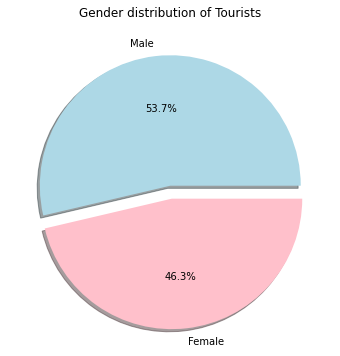

In [53]:
fig = plt.subplots(figsize = (10,6)) # set figure 
gender_totals = df['gender'].value_counts() # count for each gender 
genders = gender_totals.index # genders 

plt.pie(gender_totals,labels = genders,explode = (0,0.1),colors = ['#ADD8E6','#FFC0CB'],autopct='%1.1f%%', shadow=True) # visual 
plt.title('Gender distribution of Tourists') # title 
plt.show()

Pie chart on the gender distribution of tourists.

As shown here, the distribution of gender is almost equal. Information on gender distribution is crucial so that the tourism company can potentially remove biases that may favour one gender more than the other. 

This visual will help to answer Exploratory Question 8 - What is the distribution of gender of tourists? 

### 3.2.6 Top Ten City Residences of Tourists

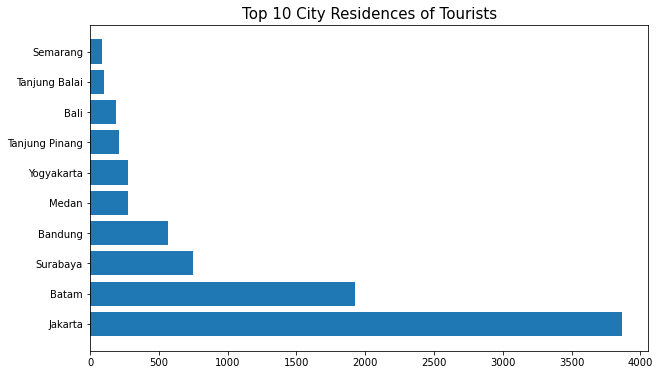

In [100]:
tourist_count = df['city_residence'].value_counts().sort_values(ascending = False) # count of tourists from countries
tourist_count = tourist_count.head(10) # top 10
cities = tourist_count.index

fig = plt.subplots(figsize = (10,6)) #set figure 

plt.barh(cities,tourist_count)
plt.title('Top 10 City Residences of Tourists',fontsize = 15)
plt.yticks(fontsize = 10)
plt.show()

These are the top 10 City Residences of Tourists. 

By understanding where most tourists come from, the tourism company can try to profile their customers more and target these groups of people.

This visual will help to answer Exploratory Question 9 - What were the Top Ten City Residences Tourists were from?


### 3.2.7 Travel Companions and Sizes

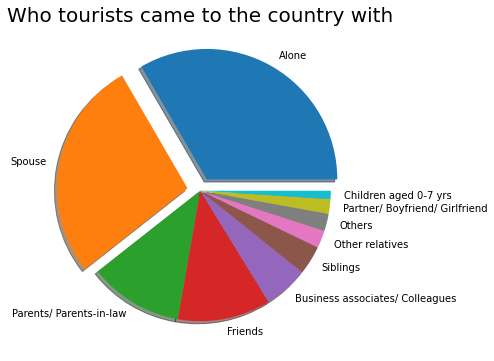

In [73]:
fig = plt.subplots(figsize = (10,6)) # set figure 

travel_companions = df['travel_companion.1'].value_counts() # count for companions
travel_companions = travel_companions.head(10) # top 10 
companions = travel_companions.index # for labels 

plt.pie(travel_companions,labels = companions,explode = (0.1,0.1,0,0,0,0,0,0,0,0),shadow = True) # visual 
plt.title('Who tourists came to the country with',fontsize = 20) # title
plt.show()

This is a pie chart on who the tourists came to the country with. The data used is the top 10 of the travel_companion.1 column, as including all would make showing the data messy and ambigous. 

It can be seen here that most tourists tend to travel alone or with their spouses. By knowing who exactly tourists tend to come to the country with, it can help the tourism company further profile and relate to their customers in their tour packages.

This visual will answer Exploratory Question 10 - Who did tourists typically go with? 

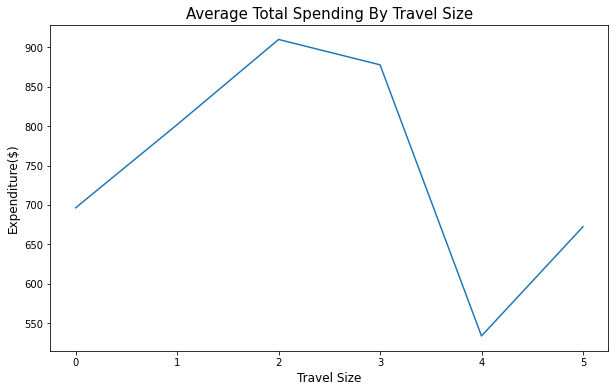

In [92]:
fig = plt.subplots(figsize = (10,6))

travel_size = df.groupby('travel_size')['total_exp'].mean()
sizes = travel_size.index

plt.plot(sizes,travel_size)

plt.title('Average Total Spending By Travel Size',fontsize = 15)
plt.xlabel('Travel Size',fontsize = 12)
plt.ylabel('Expenditure($)',fontsize = 12)
plt.show()

This is a line chart on the average total spending by travel size. It can be seen here that as the travel size gets bigger, the average spending decreases.

This is also another important aspect in knowing how expenditure is managed by tourists, so that the tourism company can accurately price their packages to cater for all group sizes or price them appropriately to generate profit/ revenue for the company.

This visual will provide further insight on Exploratory Question 7 - What is the distribution of expenses of tourists?

### Dashboard 2 - Customer Characteristics

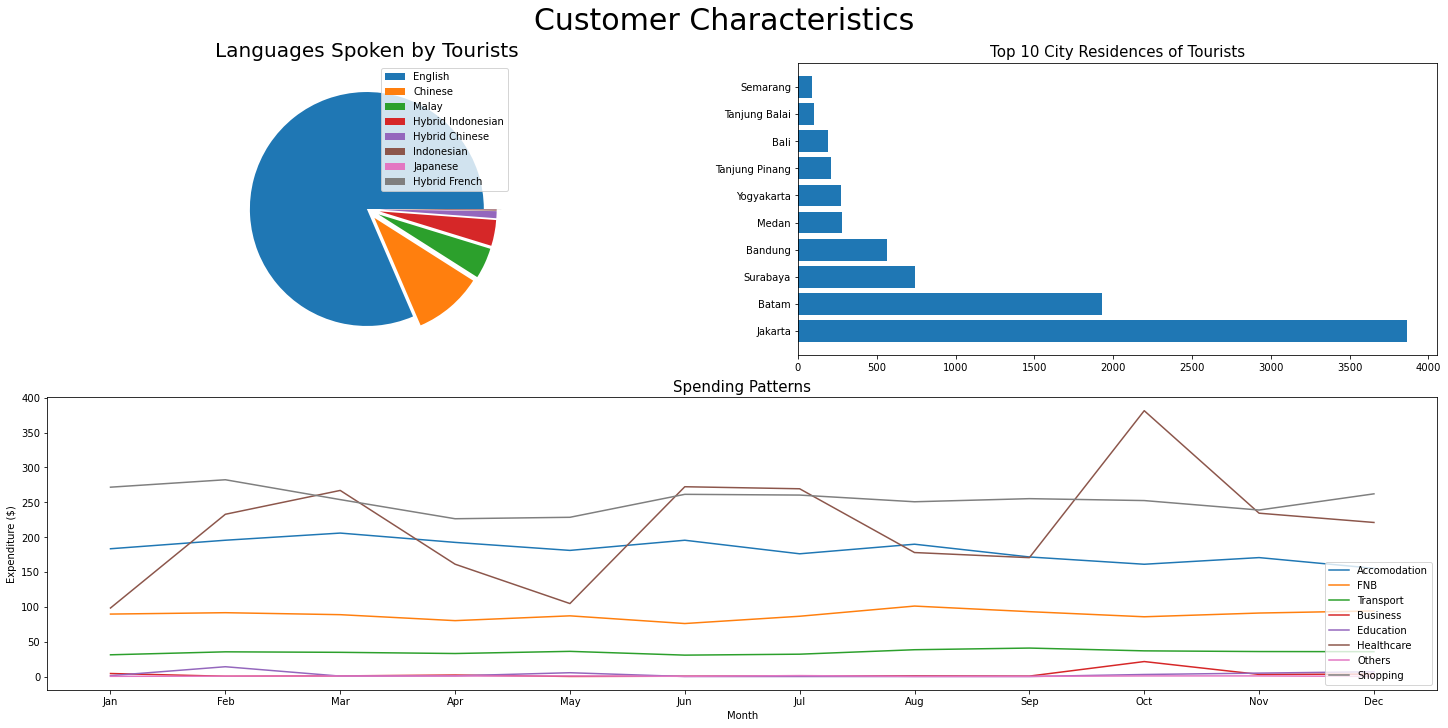

In [57]:
fig = plt.figure(figsize=(20,10), constrained_layout=True) # set dashboard figure

gs = GridSpec(nrows=2, ncols=2, figure=fig) # no of cols and rows

ax1 = fig.add_subplot(gs[0,0]) # first axes
# visual 
languages_count = df['langint'].value_counts()
languages = languages_count.index

legend = ['English','Chinese','Malay','Hybrid Indonesian','Hybrid Chinese','Indonesian','Japanese','Hybrid French']
explode = (0,0.1,0.11,0.11,0.11,0.11,0.11,0.15)
ax1.pie(languages_count,explode = explode)
plt.title('Languages Spoken by Tourists',fontsize = 20)
plt.legend(legend)

ax2 = fig.add_subplot(gs[0,1]) # second axes

# visual 

tourist_count = df['city_residence'].value_counts().sort_values(ascending = False)
tourist_count = tourist_count.head(10)
cities = tourist_count.index

plt.barh(cities,tourist_count)
plt.title('Top 10 City Residences of Tourists',fontsize = 15)

ax3 = fig.add_subplot(gs[1,:]) # third axes 

# visual 

acc = df.groupby(df.date.dt.month)['acc_exp'].mean()
fnb = df.groupby(df.date.dt.month)['fnb_exp'].mean()
trans = df.groupby(df.date.dt.month)['trans_exp'].mean()
biz = df.groupby(df.date.dt.month)['biz_exp'].mean()
edu = df.groupby(df.date.dt.month)['edu_exp'].mean()
medi = df.groupby(df.date.dt.month)['medi_exp'].mean()
oth = df.groupby(df.date.dt.month)['oth_exp'].mean()
shopping = df.groupby(df.date.dt.month)['shopping_exp'].mean()

months_index = [x[:3] for x in df.month.unique()]

ax3.plot(months_index, acc,label='Accomodation')
ax3.plot(months_index, fnb,label='FNB')
ax3.plot(months_index, trans,label='Transport')
ax3.plot(months_index, biz,label='Business')
ax3.plot(months_index,edu,label='Education')
ax3.plot(months_index, medi,label='Healthcare')
ax3.plot(months_index, oth,label='Others')
ax3.plot(months_index, shopping,label = 'Shopping')

plt.legend(loc = 'lower right')
plt.title('Spending Patterns',fontsize = 15)
plt.xlabel('Month')
plt.ylabel('Expenditure ($)')

plt.suptitle('Customer Characteristics',fontsize = 30)
plt.show()

This is the dashboard I have created on Customer Characteristics.It includes a pie chart showing the languages that tourists speak, a bar chart showing the top 10 places from which tourists came, and a multi-line chart showing the spending patterns of tourists by month.

The distribution of languages used by tourists would be shown in a pie chart, showing what are the different languages that the tourists speak.The bar graph would display the top 10 cities that tourists came from, showing which cities in Indonesia are bringing in the most tourists.

The multi-line graph would display the previous tourist spending trends, giving an insight on the spending in each category and how it varies from month to month. This can help the tourism company identify which category of spending of a tourist it should perform more research on to improve their marketing strategies towards potential customers. 

Overall, this dashboard would offer a thorough perspective of traveller spending patterns as well as their culture and behaviour through where they are from and what language they speak.This would enable a better understanding of the wants and needs of tourists who will potentially visit the country. 


## 3.3 Stay Analysis <a id="part3.3"></a>

### 3.3.1 Percentage of first visitors

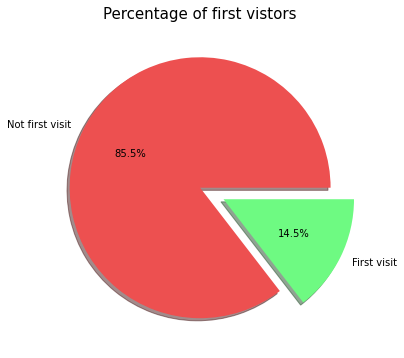

In [58]:
first_visitors = df['1st_visit'].value_counts() # count of values 
values = first_visitors.index 

colors = ['#ed5050','#6efa82']
fig = plt.subplots(figsize = (10,6)) # set figure

plt.pie(first_visitors,labels=values, autopct='%1.1f%%',explode = (0,0.2),colors = colors,shadow = True) # visual 
plt.set_title('Percentage of first vistors',fontsize = 15) # title 

plt.show()

This is a pie chart on the distribution of the percentage of first visitors. 

As shown here, it is clear that most customers are not first visitors. Given this information, the tour company will be able to devise ways to make their tour package more attractive towards first visitors, and also how they can still market towards the people who have already visited Singapore more than once. such as introducing new things into their tour package. 

This will help answer Exploratory Question 11 - How frequent are first visitors? 


### 3.3.2 Average number of days a tourist spends in the country 

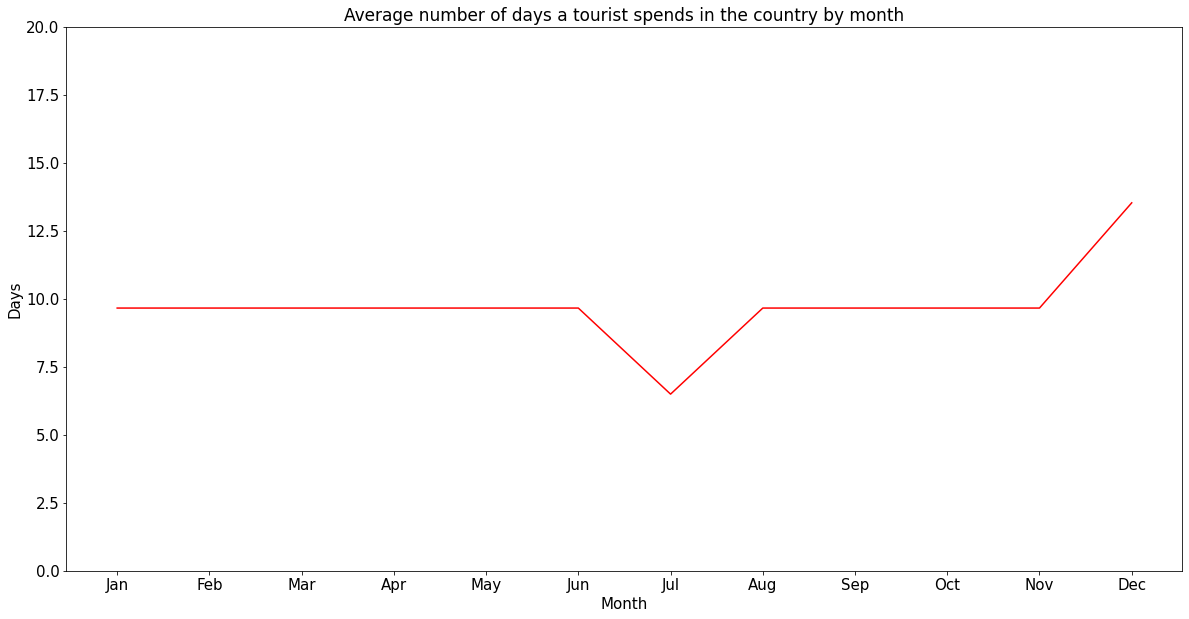

In [59]:
length_stays = df.groupby(df.date.dt.month)['length_stay'].unique()
mean_days = []

months_index = [x[:3] for x in df.month.unique()]

for values in length_stays : 
    mean = values.mean()
    mean_days.append(mean)

fig, ax3 = plt.subplots(figsize = (20,10))

ax3.plot(months_index,mean_days,'r')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(bottom = 0, top = 20)
plt.xlabel('Month', fontsize = 15);
plt.ylabel('Days', fontsize = 15);
plt.title('Average number of days a tourist spends in the country by month', fontsize = 17)

plt.show()

This is a line chart on the average amount of days a tourist spends in the country. It can be seen that the more significant values here are the months of July, and December. Other than those 2 months, the average number of days a tourist stays in the country is constant. 

Through this information, the tour company will be able to know when they should advertise their packages more. For example, the company could increase its advertising outreach in November, in order to garner more customers in December; a time when tourists typically spend more days in the country. 

This visual answers the Exploratory Question 1 -  At which time typically do customers visit? 
and may also provide some insight on Exploratory Question 12 - Typically how long did tourists visit for? 


### 3.3.3 Distribution of stay length

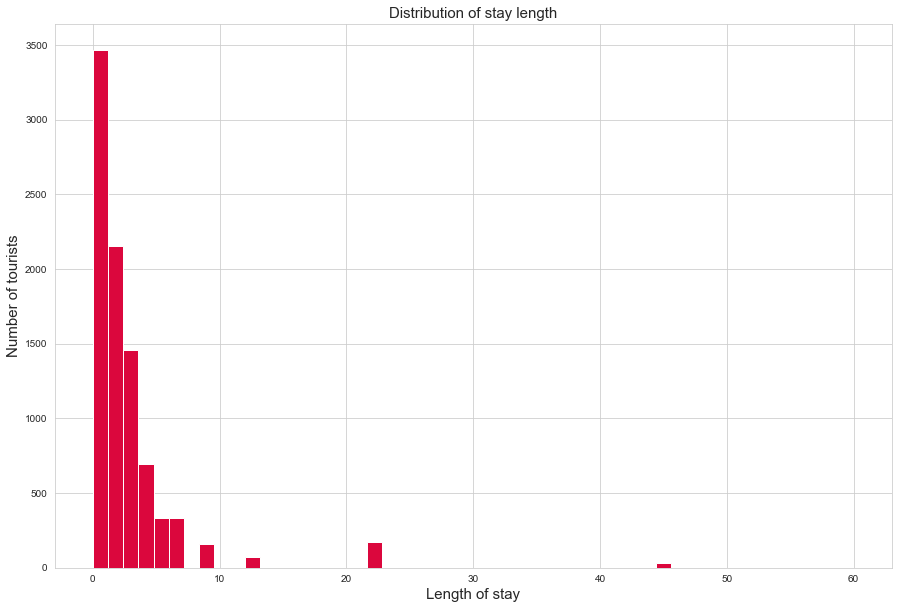

In [106]:
fig , ax4 = plt.subplots(figsize = (15,10))


ax4.hist(df.length_stay, bins=50,color = '#DB073D')
plt.title('Distribution of stay length',fontsize = 15)
plt.xlabel('Length of stay',fontsize = 15)
plt.ylabel('Number of tourists',fontsize = 15)
plt.show()

As the visual’s title suggests, this is a histogram on the distribution of the length of stay of tourists. 

Through this visual, the tour company will be able to see how the length stays are distributed among customers. This is crucial information the tourism company would be able to identify whether majority of tourists stay for a short or long time. Through this, the company can introduce packages or tours based around those stay lengths e.g. 1-2 day tours.

This visual will help to answer Exploratory Question 12 as well. 


Text(0.5, 1.0, 'Length stay by purpose')

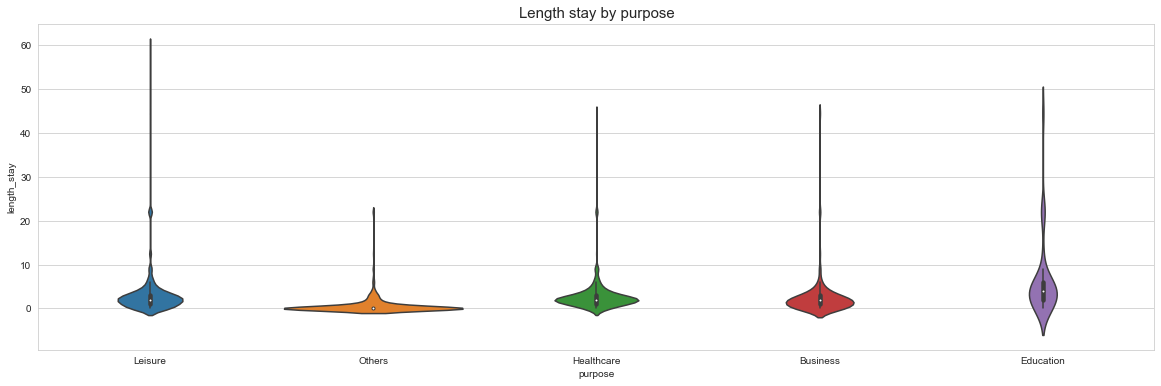

In [104]:
plt.figure(figsize=(20,6))

sns.set_style('whitegrid')
 
sns.violinplot(x='purpose', y='length_stay', data=df) 

plt.title('Length stay by purpose',fontsize = 15)

This is a violin plot showing the distribution of length stay based on its purpose. 

It can be seen here that most tourists tend to spend time in the country for about 2 days, based on each purpose.

This visual is a further analysis of the length stay of tourists based on the purpose of coming to the country. By knowing typically how long a tourist would stay in the country based on purpose, it would further help with the planning of the tour company.

### 3.3.4 Accommodation Types Among Tourists

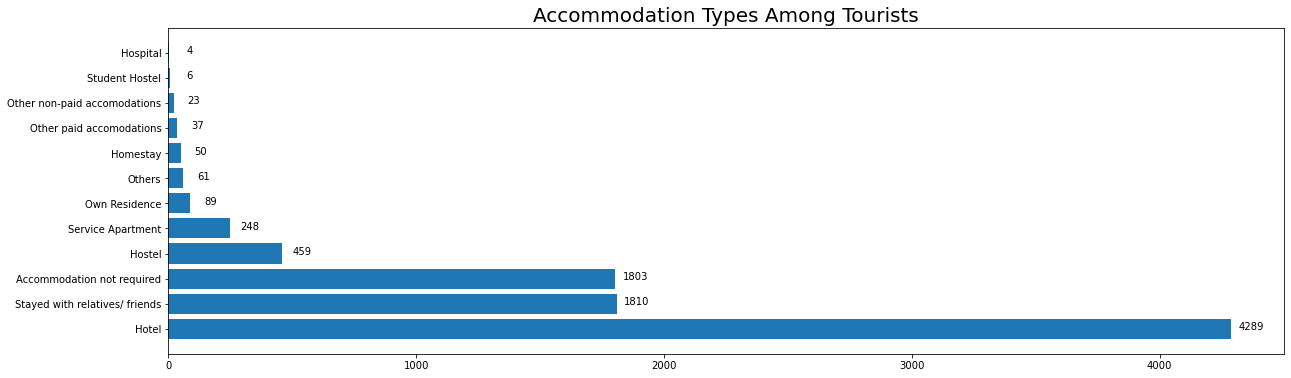

In [61]:
acc_totals = df['acc_type'].value_counts()
acc_types = acc_totals.index

fig,ax7 = plt.subplots(figsize = (20,6))
plt.barh(acc_types,acc_totals)

for x, y in zip(acc_totals,acc_types): 

    label = x

    ax7.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(20,-1), 
                 ha='center') 
    
plt.title('Accommodation Types Among Tourists',fontsize = 20)

plt.show()

This is a horizontal bar chart on the count of accommodation types among tourists.

It can be clearly seen that most tourists prefer hotels over other accommodation types.
The tourism board can capitalise on this by setting up advertisements at the popular hotels that tourists go to in order to gain potential customers or increase their advertising outreach and publicity. Merlion tours can also potentially collaborate with these hotels, by introducing things such as a hotel booking (of a respective hotel) paired with the tourism package. 

This visual will help to answer Exploratory Question 13 - Which accommodation type is the most popular amongst tourists? 


### 3.3.5 Top 5 Hotels Tourists Stayed At

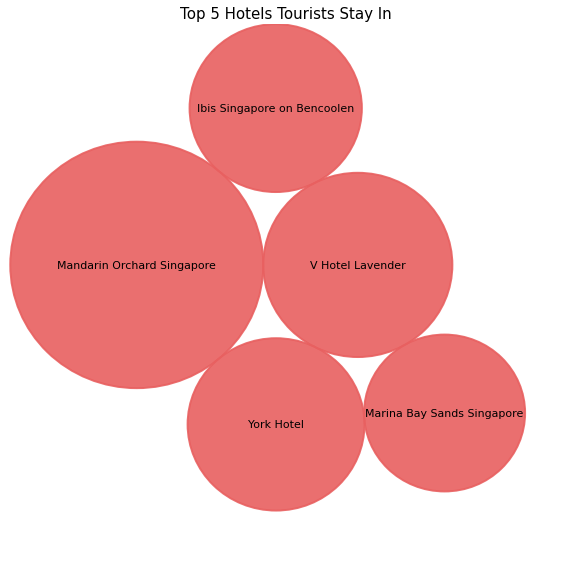

In [93]:
hotel_count = df['hotel_name'].value_counts(sort = True)
hotel_count = hotel_count.head(5).sort_values(ascending = True)
hotels = hotel_count.index

circles = circ.circlify(
            hotel_count.tolist(),
            show_enclosure = False,
            target_enclosure = circ.Circle(x =0,y=0,r=1))

fig, ax = plt.subplots(figsize = (10,10))

ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(lim, -lim)
plt.ylim(lim, -lim)

# print circles
for circle, label in zip(circles, hotels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, linewidth=2,color = '#e86060'))
    plt.annotate(
          label, 
          (x,y) ,
          fontsize = 11,
          va='center',
          ha='center'
     )
    
plt.title('Top 5 Hotels Tourists Stay In',fontsize = 15)
plt.show()

This is a stacked circle chart on the 5 Top Hotels Tourists Stayed at. This can be seen as a further drill through of the previous visual on accommodation types from tourists. By knowing which hotels most tourists go to, the tourism company could potentially collaborate with these hotels.

For example, Merlion Tours could set up a tourism package along with a booking stay at Mandarin Orchard Singapore - an example mentioned previously now with more depth. 

This will help to answer Exploratory Question 15 - What were the Top 10 Hotels Tourists Stay In?


### 3.3.6 Purpose of Stay 

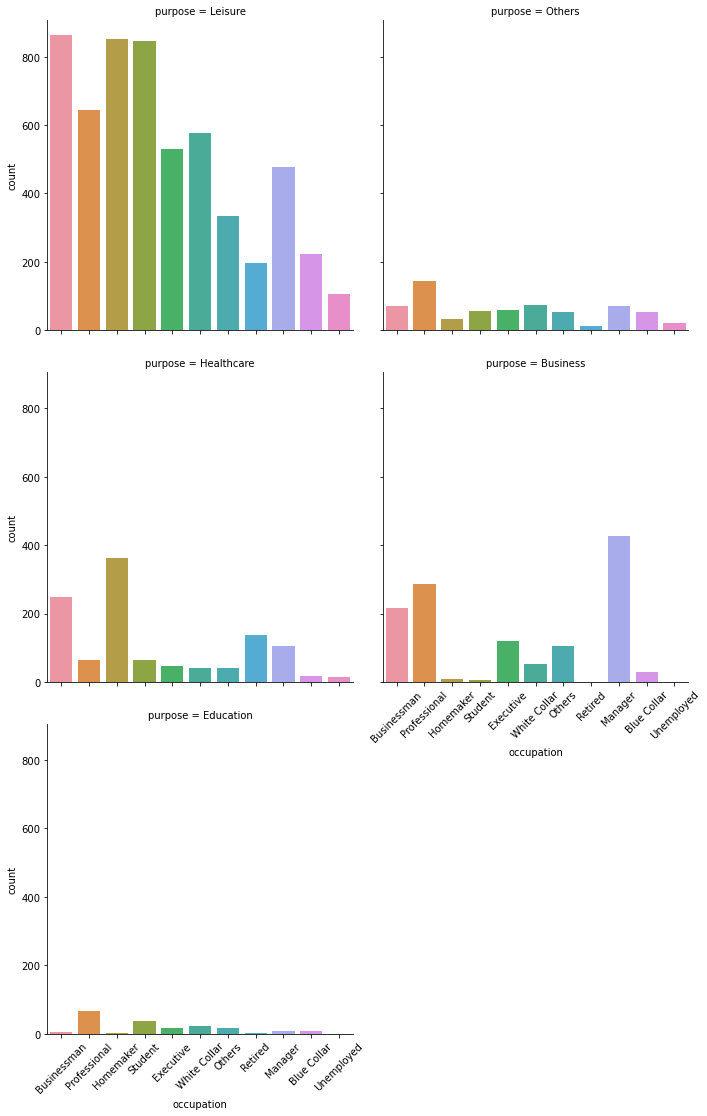

In [63]:
ax14 = sns.catplot('occupation',col = 'purpose',data = df,kind = 'count',col_wrap = 2)
ax14.set_xticklabels(rotation=45)

plt.show()

This is a catplot on the count of types of people who stayed in the country for a certain purpose. For the example shown here, the majority of those who come to the country come for Leisure. And in that specific Category the top 3 types of tourists found are Businessmen, Students and Homemakers. 

By recognising their target customers well based on what they visit the country for, it can help the tourism company devise ways to market to them better by relating to them.

This visual will help answer to further Exploratory Question 14 - Typically what did tourists visit for? 


### Dashboard 3 - Stay Analysis of Tourists

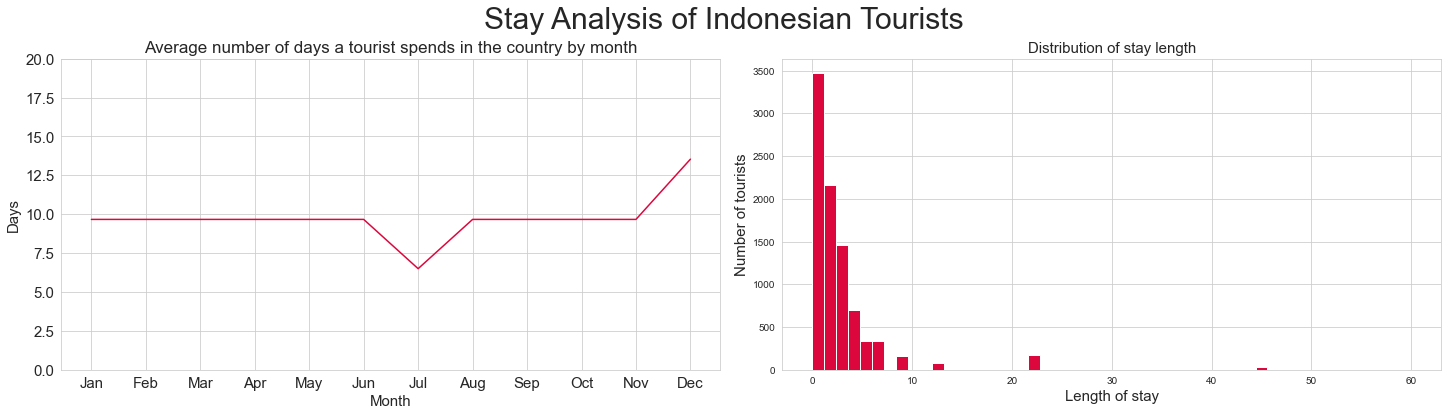

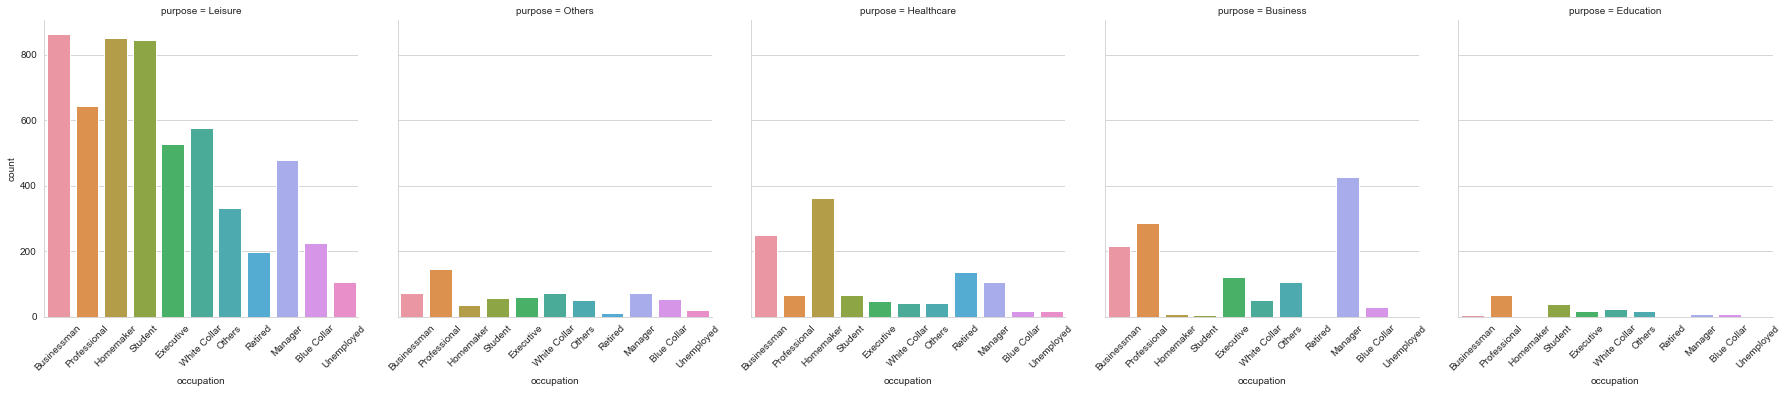

In [107]:
fig = plt.figure(figsize=(20,10), constrained_layout=True)

gs = GridSpec(nrows=2, ncols=2, figure=fig)

ax1 = fig.add_subplot(gs[0,0])
length_stays = df.groupby(df.date.dt.month)['length_stay'].unique()
mean_days = []

months_index = [x[:3] for x in df.month.unique()]

for values in length_stays : 
    mean = values.mean()
    mean_days.append(mean)
    
ax1.plot(months_index,mean_days,'#DB073D')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(bottom = 0, top = 20)
plt.xlabel('Month', fontsize = 15);
plt.ylabel('Days', fontsize = 15);
plt.title('Average number of days a tourist spends in the country by month', fontsize = 17)

ax2 = fig.add_subplot(gs[0,1])

ax2.hist(df.length_stay, bins=50,color = '#DB073D')
plt.title('Distribution of stay length',fontsize = 15)
plt.xlabel('Length of stay',fontsize = 15)
plt.ylabel('Number of tourists',fontsize = 15)

ax3 = sns.catplot('occupation',col = 'purpose',data = df,kind = 'count')
ax3.set_xticklabels(rotation=45)

fig.suptitle('Stay Analysis of Indonesian Tourists',fontsize = 30)

plt.show()

For the Stay Analysis dashboard,it contains a line chart showing the typical length of stay of visitors by month, a histogram showing the distribution of length stays, and a catplot showing the proportion of people in a given occupation by the reason for travel could be used.

The line graph would display the typical duration of stay of visitors over time, enabling examination of trends and variations in tourism activities. The histogram would provide insight on the distribution of stay durations and reveal if most visitors remain for short or extended periods of time.

The association between tourists' jobs and their travel objectives would be demonstrated by the catplot. This information might be used to determine which occupations are most likely to travel for leisure, or other respective categories.

Overall, this dashboard would offer a thorough view of travel trends and enable the evaluation of significant trends and insights regarding tourist behaviour.


# 4. Reflection 

As compared to Assignment 1 where we used Tableau for data cleaning and visualisation, I definitely found this assignment more difficult. One reason for this is because the cleaning and creating visuals was done using code : it was quite hard for me to visualize how to plot certain visuals.Using tableau, it is definitely easier for you to create visuals as they are automated for you.However, creating visuals through code definitely required more critical thinking.Data visualisation through code was definitely an enriching learning experience for me.I believe this assignment will be a learning curve for me and I will definitely try to improve on upcoming assignments that will be using Jupyter Notebook. 

If given the chance to do the assignment again, here are certain things I would like to improve on. Firstly, time management. Even though I felt that I started on time, I felt that I was slow in progress for this assignment. Being slow is partly due to my second point, which is that I did not fully understand on the usage of libraries for data cleaning and data visualisation. Hence, I would try to make better preparation in those aspects, by preparing how to utilize and create code correctly. And lastly, one thing I would want to improve on is the understanding of business principles. To do this, I would try to research what are important aspects in a business and understanding how they operate and market to their customers, which in this case is the tourism industry. 

In summary, this assignment really helped to widen my perspective on data analysis and visualisation, and also on certain business concepts. It has definitely been a good learning experience for me throughout the module.